In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,roc_curve,confusion_matrix
import seaborn as sns

In [317]:
data = pd.read_csv('dataset_example.csv')

In [318]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [319]:
data.shape,data.size

((101613, 11), 1117743)

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101609 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [321]:
len(data['nameOrig'].unique())

101613

In [322]:
data.drop('isFlaggedFraud',axis=1,inplace=True)

In [323]:
data.drop('nameOrig',axis=1,inplace=True)

In [324]:
data.isna().sum()

step              0
type              0
amount            4
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [325]:
data['amount'].fillna(data['amount'].mean(),inplace=True)

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   oldbalanceOrg   101613 non-null  float64
 4   newbalanceOrig  101613 non-null  float64
 5   nameDest        101613 non-null  object 
 6   oldbalanceDest  101613 non-null  float64
 7   newbalanceDest  101613 non-null  float64
 8   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 7.0+ MB


In [327]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000
mean,8.523457,1.740932e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142
std,1.820681,3.450189e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,1.001671e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.338653e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000
75%,10.000000,2.124885e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000


In [328]:
len(data['nameDest'].unique())

52280

In [329]:
data.drop('nameDest',axis=1,inplace=True)

In [330]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,785.00,0.00,0.00,0.00,0
101609,10,CASH_OUT,282252.35,220339.29,0.00,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,0.00,0.00,0.00,0.00,0
101611,10,TRANSFER,1347146.45,1605.00,0.00,541639.43,2186953.43,0


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   oldbalanceOrg   101613 non-null  float64
 4   newbalanceOrig  101613 non-null  float64
 5   oldbalanceDest  101613 non-null  float64
 6   newbalanceDest  101613 non-null  float64
 7   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 6.2+ MB


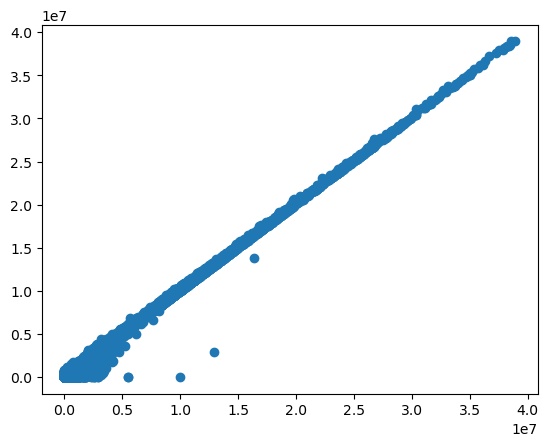

In [332]:
plt.scatter(data['oldbalanceOrg'],data['newbalanceOrig'])
plt.show()

In [333]:
transform = pd.get_dummies(data)

In [334]:
transform

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,10,7477.02,785.00,0.00,0.00,0.00,0,0,0,0,1,0
101609,10,282252.35,220339.29,0.00,95156.01,91286.97,0,0,1,0,0,0
101610,10,17289.01,0.00,0.00,0.00,0.00,0,0,0,0,1,0
101611,10,1347146.45,1605.00,0.00,541639.43,2186953.43,0,0,0,0,0,1


In [335]:
#spliting data
x = transform.drop('isFraud',axis=1)
y = transform['isFraud']

In [336]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [337]:
y

0         0
1         0
2         1
3         1
4         0
         ..
101608    0
101609    0
101610    0
101611    0
101612    0
Name: isFraud, Length: 101613, dtype: int64

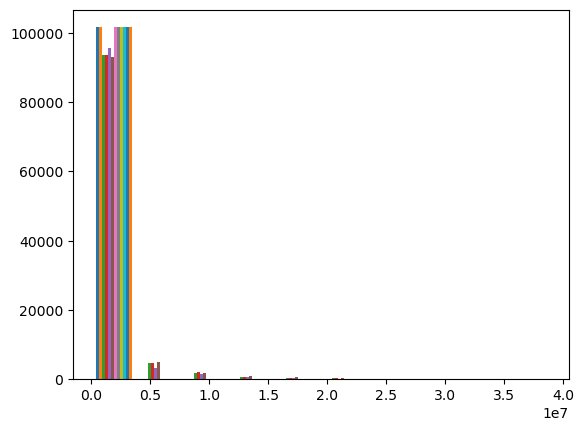

In [338]:
plt.hist(transform);

In [339]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.9)

In [340]:
model = KNeighborsClassifier()

In [341]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [342]:
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [343]:
model.score(xtest,ytest)

0.9988846608056685

In [344]:
cross_val_score(estimator = model,X=x,y=y)

array([0.99881907, 0.99886828, 0.99881907, 0.99891743, 0.99896664])

In [347]:
#predicting y
ytrue = ytest
ypred = model.predict(xtest)

In [350]:
ytrue.size,ypred.size

(91452, 91452)

In [352]:
precision_score(ytrue,ypred)

/Users/jainampatel/Desktop/core/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [356]:
roc_curve(ytrue,ypred)

(array([0., 1.]), array([0., 1.]), array([1, 0]))

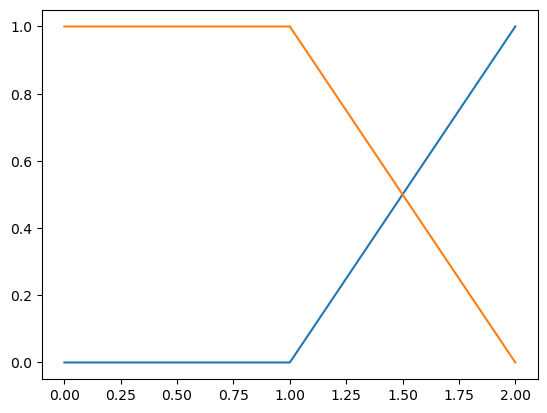

In [358]:
plt.plot(roc_curve(ytrue,ypred));

In [363]:
confusion_matrix(ytrue,ypred)

array([[91350,     0],
       [  102,     0]])

<Axes: >

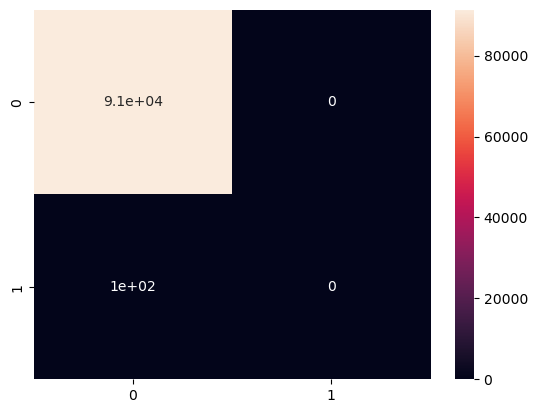

In [371]:
sns.heatmap(confusion_matrix(ytrue,ypred),annot = True,cbar=True)